In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [11]:
#what is the latest date?
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [12]:
# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()

##### Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precip_data, columns=['date', 'precip'])
df

In [25]:
# remove rows that are NaN values
df = df.sort_values(by='date').dropna()
df

,date,precip
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79
...,...,...
2225,2017-08-22,0.50
2228,2017-08-23,0.08
2226,2017-08-23,0.00
2227,2017-08-23,0.00


In [26]:
# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()

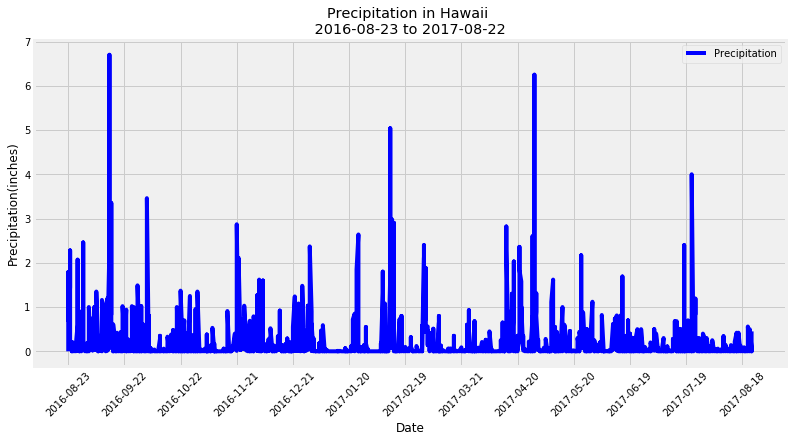

In [68]:
# Use Pandas Plotting with Matplotlib to plot the data

# Create the plot space upon which to plot the data
fig, ax = plt.subplots(figsize=(12, 6))

# Add the x-axis and the y-axis to the plot
ax.plot(df['date'],df['precip'],
        color='blue')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation(inches)",
       title="Precipitation in Hawaii \n 2016-08-23 to 2017-08-22 ")
plt.legend(["Precipitation"], loc='upper right')
plt.xticks(np.arange(0, 365, step=30))
#df.plot(rot=90)
plt.xticks(rotation = 45)
plt.show()
fig.savefig('hawaii_precipitation.png')

In [69]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precip
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [71]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station).group_by(Station.id).count()
print('Total stations in dataset is ' + str(stations))

Total stations in dataset is 9


In [72]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
for station in active_stations:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [73]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
station_USC00519281 = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)\
    , Measurement.station).\
    filter(Measurement.station == 'USC00519281').all()

station_USC00519281

[(54.0, 85.0, 71.66378066378067, 'USC00519281')]

In [77]:
#put those results in a dataframe
usc_df = pd.DataFrame(station_USC00519281, columns=['lowest temp', 'highest temp','average temp','name of station'])
usc_df

,lowest temp,highest temp,average temp,name of station
0,54.0,85.0,71.663781,USC00519281


In [119]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and print as pandas dataframe
station_name = 'USC00519281'

last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
max_date= dt.date(2017, 8, 23)
results = session.query(Measurement.date, Measurement.tobs).filter(
                        Measurement.station == station_name).filter(
                        Measurement.date >= last_year).filter(
                        Measurement.date <= max_date).all()
temps_df = pd.DataFrame(results)
temps_df.head()


,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


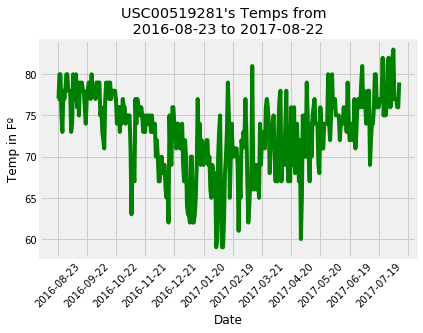

In [134]:
#plot the results in a line graph
fig, ax = plt.subplots()
#temps_df.plot.hist(bins=12)
#plt.tight_layout()
# Add the x-axis and the y-axis to the plot
ax.plot(temps_df['date'],temps_df['tobs'],
        color='green')
#labels
ax.set(xlabel="Date",
       ylabel="Temp in Fº",
       title="USC00519281's Temps from  \n 2016-08-23 to 2017-08-22 ")
plt.xticks(np.arange(0, 365, step=30))
plt.xticks(rotation = 45)
plt.show()

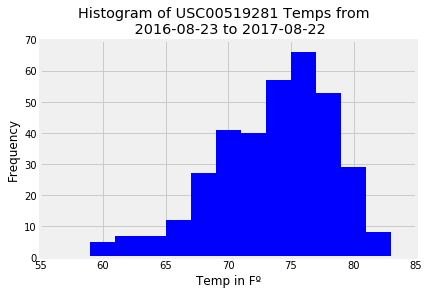

In [133]:
#plot the results as a histogram
#load temps_df into an array
a = np.array(temps_df)
bins=12
#define range of x so that x can be used in plt.hist command below
x = a[0:,1]
plt.hist(x,12,facecolor='blue')
#label it so that we know what we are looking at
plt.xlabel('Temp in Fº')
plt.ylabel('Frequency')
plt.title('Histogram of USC00519281 Temps from  \n 2016-08-23 to 2017-08-22')
#adjust size of histogram to fit the data more tightly
plt.xlim(55, 85)
plt.ylim(0, 70)
plt.grid(True)
#print it and save it
plt.show()
fig.savefig('histogram_USC00519281_temps.png')

![precipitation](Images/station-histogram.png)

In [127]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [146]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

print(calc_temps('2017-03-14', '2017-03-21'))

[(65.0, 72.14285714285714, 77.0)]


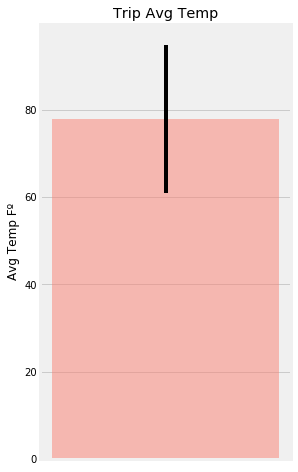

In [147]:
# Plot the results from your previous query as a bar chart. 
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
yerr=tmax-tmin
x=1
bar=ax.bar(x, tmax, yerr=yerr, alpha=0.5, color="salmon")
#labels: Use "Trip Avg Temp" as your Title; Use the average temperature for the y value
ax.set(xticks=range(x),
       ylabel="Avg Temp Fº",
       title="Trip Avg Temp")
plt.xticks(rotation = 45)
plt.show()
#save it as a png file
fig.savefig('Trip_Avg_Temp_bar_chart.png')


In [148]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rain = \
session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation,
              func.sum(Measurement.prcp)).\
              filter(Measurement.date >= '2017-03-14').\
              filter(Measurement.date <='2017-03-21'). \
              group_by(Station.name). \
              order_by(func.sum(Measurement.prcp).desc()).all()
rainfall_df = pd.DataFrame(rain, columns =['Station ID', 'Station Name', 'Total Precipitation', 
            'Latitude', 'Longitude', 'Elevation'])

rainfall_df


,Station ID,Station Name,Total Precipitation,Latitude,Longitude,Elevation
0,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.95
1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.95
2,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.95
3,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,0.95
4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.95
5,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.95
6,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.95
7,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.95
8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,0.95


## Optional Challenge Assignment

In [153]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [155]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
trip_start = '2017-03-14'
trip_end = '2017-03-21'
# Use the start and end date to create a range of dates
trip_dates = pd.date_range(trip_start, trip_end, freq='D')
# STRIP off the year and save a list of %m-%d strings
trip_month_day = trip_dates.strftime('%m-%d')
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for date in trip_month_day:
    normals.append(*daily_normals(date))
    
normals

[(62.0, 70.32758620689656, 77.0),
 (58.0, 68.54716981132076, 76.0),
 (60.0, 69.70370370370371, 78.0),
 (57.0, 68.54, 75.0),
 (57.0, 67.7843137254902, 76.0),
 (60.0, 69.1, 75.0),
 (62.0, 70.11764705882354, 80.0),
 (60.0, 71.07692307692308, 77.0)]

In [156]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trips_df = pd.DataFrame(normals, columns=['tmin', 'tavg', 'tmax'])
trips_df['date'] = trip_dates
trips_df.set_index(['date'],inplace=True)
trips_df.head()

,tmin,tavg,tmax
date,,,
2017-03-14,62.0,70.327586,77.0
2017-03-15,58.0,68.547170,76.0
2017-03-16,60.0,69.703704,78.0
2017-03-17,57.0,68.540000,75.0
2017-03-18,57.0,67.784314,76.0


<IPython.core.display.Javascript object>


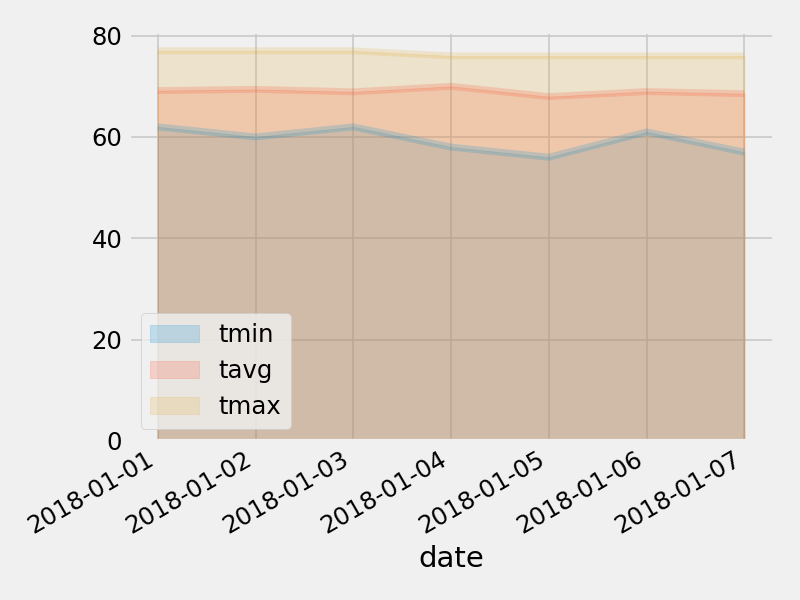

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
